In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as sps

$H_0:$ выручка не увеличилась VS $H_1:$ увеличилась

In [13]:
df = pd.read_csv('before_exp.csv')
# До сентября

In [15]:
df['segment_group_exp'].unique()

array(['control', 'test_user', 'test_user_plus_comp'], dtype=object)

In [16]:
# control -- глобальный контроль, который не получает скидки вообще
# test_user -- пользователи, которые сейчас получают скидку на X2, X5, X10, и до начала теста получали скидку
# test_user_plus_comp -- пользователи, которые сейчас получают скидку на X2, X5, X10 и X15, X20, но до начала теста получали скидку на X2, X5, X10

In [18]:
df

,user_id,segment_group_exp,revenue
0,472212000093,control,1164.00
1,281555750084,control,486.00
2,346392750028,test_user,3.57
3,308947500240,control,334.00
4,6607750188,test_user_plus_comp,5597.00
...,...,...,...
1331488,9123250136,test_user,135.00
1331489,835649500178,control,112.00
1331490,32500574,test_user,686.00
1331491,835725500129,test_user_plus_comp,4540.00


/root/Python3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/root/Python3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/root/Python3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

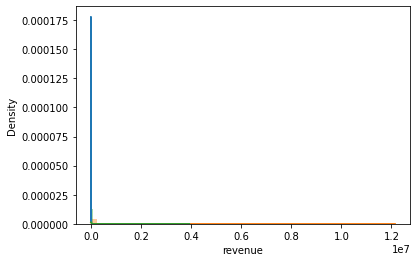

In [19]:
sns.distplot(df[df['segment_group_exp'] == 'control']['revenue'], label='control')
sns.distplot(df[df['segment_group_exp'] == 'test_user_plus_comp']['revenue'], label='test_user_plus_comp')
sns.distplot(df[df['segment_group_exp'] == 'test_user']['revenue'], label='test_user')


In [20]:
def clean_data(array):
    q = np.quantile(array, 0.95)
    return array[array < q]

/root/Python3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/root/Python3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/root/Python3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

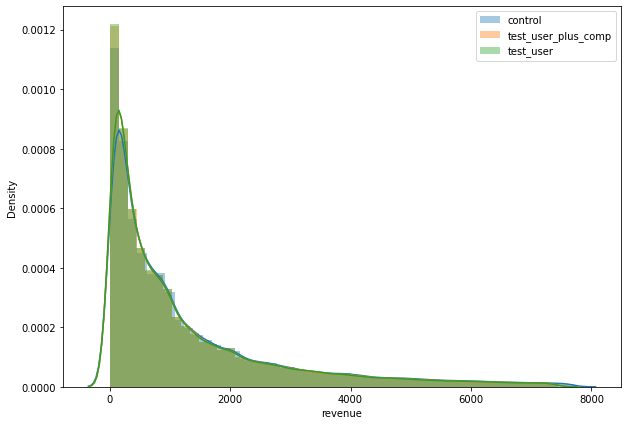

In [23]:
plt.figure(figsize=(10, 7))
sns.distplot(clean_data(df[df['segment_group_exp'] == 'control']['revenue']), label='control')
sns.distplot(clean_data(df[df['segment_group_exp'] == 'test_user_plus_comp']['revenue']), label='test_user_plus_comp')
sns.distplot(clean_data(df[df['segment_group_exp'] == 'test_user']['revenue']), label='test_user')
plt.legend()
plt.show()

In [24]:
# Подозрение, что контроль также получал скидку

In [29]:
control = np.array(df[df['segment_group_exp'] == 'control']['revenue'])
control.mean()

1973.7320473331908

In [30]:
test_user = np.array(df[df['segment_group_exp'] == 'test_user']['revenue'])
test_user.mean()

1901.648279489946

In [31]:
test_user_plus_comp = np.array(df[df['segment_group_exp'] == 'test_user_plus_comp']['revenue'])
test_user_plus_comp.mean()

1917.6645842137475

In [37]:
sps.ttest_ind(control, test_user)
# Уточнить у создателя задачи, почему в контроле больше денег?

Ttest_indResult(statistic=5.3963716620176125, pvalue=6.801959170496847e-08)

In [36]:
sps.ttest_ind(test_user_plus_comp, test_user)

Ttest_indResult(statistic=0.5407106283705405, pvalue=0.5887071836787556)

In [38]:
# как считать MDE? Подходят ли 2 месяца наблюдений?

In [39]:
len(test_user_plus_comp), len(test_user)

(455751, 455952)

In [42]:
alpha = 0.05
power = 0.5

# Можно добавить test_user_plus_comp + rand(0, 200), или test_user_plus_comp * 1.01
S2_T = np.var(test_user_plus_comp) / len(test_user_plus_comp)
S2_C = np.var(test_user) / len(test_user)

S2 = S2_T + S2_C

MDE = (sps.norm().ppf(1 - alpha) + sps.norm().ppf(power)) * np.sqrt(S2)
MDE

48.7294799175123

In [44]:
sps.norm().ppf(1 - alpha) * np.sqrt(S2)

48.7294799175123

In [45]:
# MDE = 49. Что это значит?

# В эксперименте Эффект может быть больше 49 рублей, но вы его не задетектируете!
# 1. сезонность: у вас просто изменилось поведение пользователей. Осенью больше покупают, дисперсия стала больше
# 2. Не учтено, что есть некое влияение на тест во время эксперимента. Поэтому дисперсия может стать больше/меньше
# Но! мы считаем, что эти 2 фактора не так сильно поменяют MDE. Поэтому ему можно верить.

-------

In [46]:
# с сентября
exp_df = pd.read_csv('exp.csv')

In [57]:
control = np.array(exp_df[exp_df['segment_group_exp'] == 'control']['revenue'])
control.mean()

2048.052529526669

In [58]:
test_user = np.array(exp_df[exp_df['segment_group_exp'] == 'test_user']['revenue'])
test_user.mean()

2045.1728440713052

In [59]:
test_user_plus_comp = np.array(exp_df[exp_df['segment_group_exp'] == 'test_user_plus_comp']['revenue'])
test_user_plus_comp.mean()

2072.3358066795254

In [60]:
sps.ttest_ind(test_user_plus_comp, test_user, alternative='greater')

Ttest_indResult(statistic=1.6095183750034618, pvalue=0.05375169330820853)

In [61]:
S2_T = np.var(test_user_plus_comp) / len(test_user_plus_comp)
S2_C = np.var(test_user) / len(test_user)

S2 = S2_T + S2_C

MDE = (sps.norm().ppf(1 - alpha) + sps.norm().ppf(power)) * np.sqrt(S2)
MDE

27.762616910124894

In [53]:
from statsmodels.stats.api import CompareMeans, DescrStatsW

In [55]:

cm = CompareMeans(DescrStatsW(test_user_plus_comp), DescrStatsW(test_user))
print(cm.tconfint_diff(usevar='unequal'))

(-5.918329236990353, 60.244254453428816)


Мораль: скидка не принесла эффекта. По крайней мере текущими методами.